<a href="https://colab.research.google.com/github/Puneetrai004/100-Days-of-Machine-Learning/blob/main/Obesity_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
train_data = pd.read_csv("/content/train.csv")

In [3]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20758.0,NaN,NaN,NaN,10378.5,5992.46278,0.0,5189.25,10378.5,15567.75,20757.0
Gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20758.0,NaN,NaN,NaN,23.841804,5.688072,14.0,20.0,22.815416,26.0,61.0
Height,20758.0,NaN,NaN,NaN,1.700245,0.087312,1.45,1.631856,1.7,1.762887,1.975663
Weight,20758.0,NaN,NaN,NaN,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,20758.0,NaN,NaN,NaN,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0
NCP,20758.0,NaN,NaN,NaN,2.761332,0.705375,1.0,3.0,3.0,3.0,4.0
CAEC,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_data.describe(include="all")

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


In [7]:
train_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


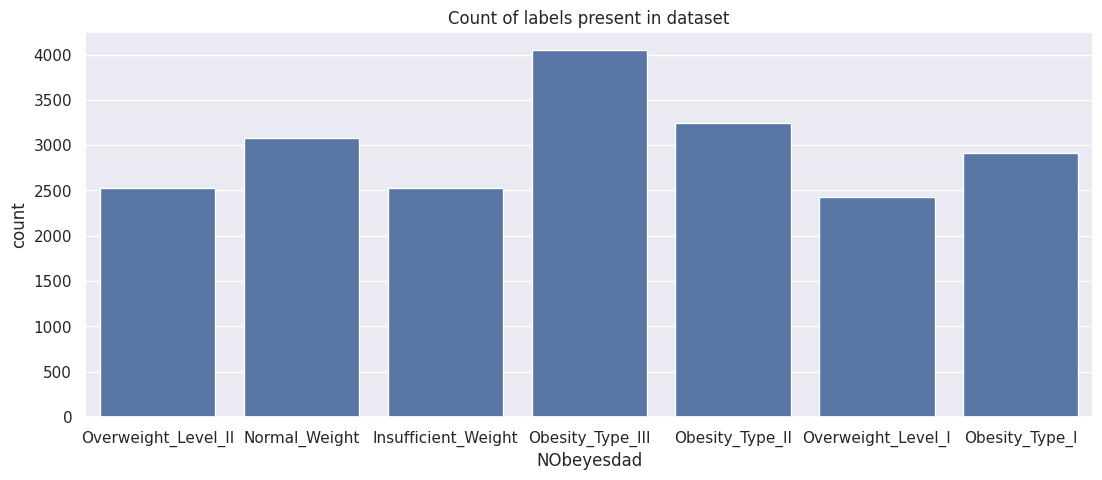

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,5))
plt.title("Count of labels present in dataset")
sns.countplot(data=train_data, x='NObeyesdad');

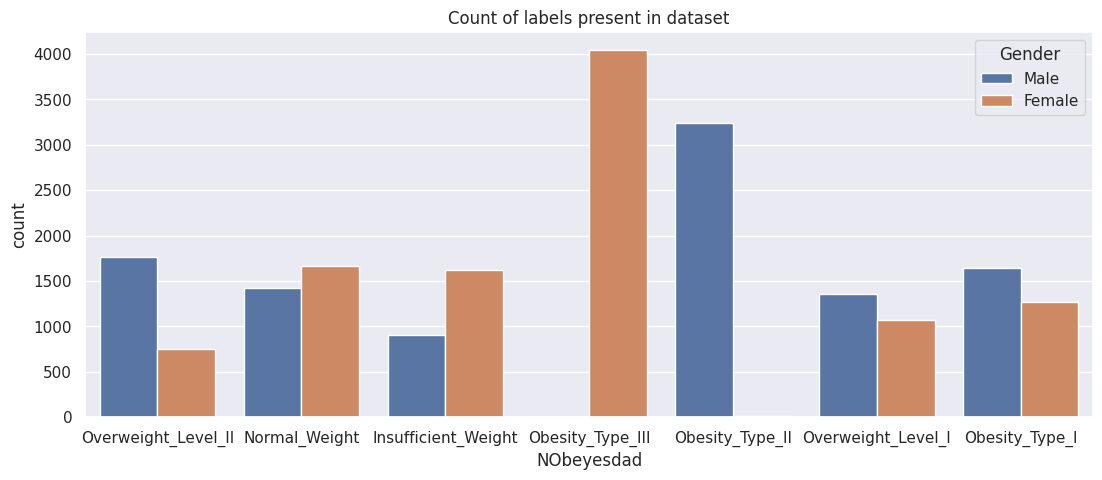

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,5))
plt.title("Count of labels present in dataset")
sns.countplot(data=train_data, x='NObeyesdad', hue="Gender");

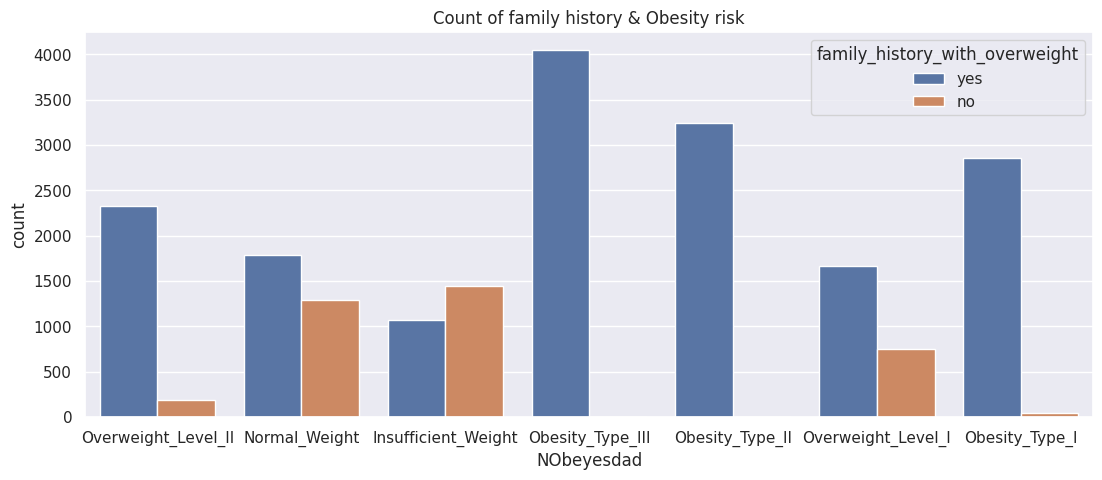

In [10]:
plt.figure(figsize=(13,5))
plt.title("Count of family history & Obesity risk")
sns.countplot(data=train_data, x='NObeyesdad', hue="family_history_with_overweight");

<Axes: title={'center': 'Count FAVC & Obesity risk'}, xlabel='NObeyesdad', ylabel='count'>

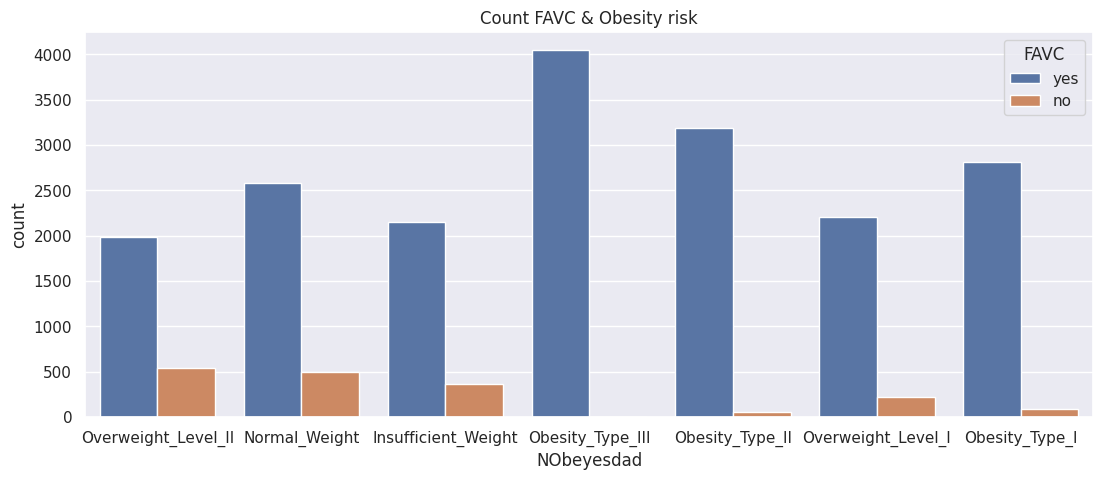

In [11]:
plt.figure(figsize=(13,5))
plt.title("Count FAVC & Obesity risk")
sns.countplot(data=train_data, x='NObeyesdad', hue="FAVC")

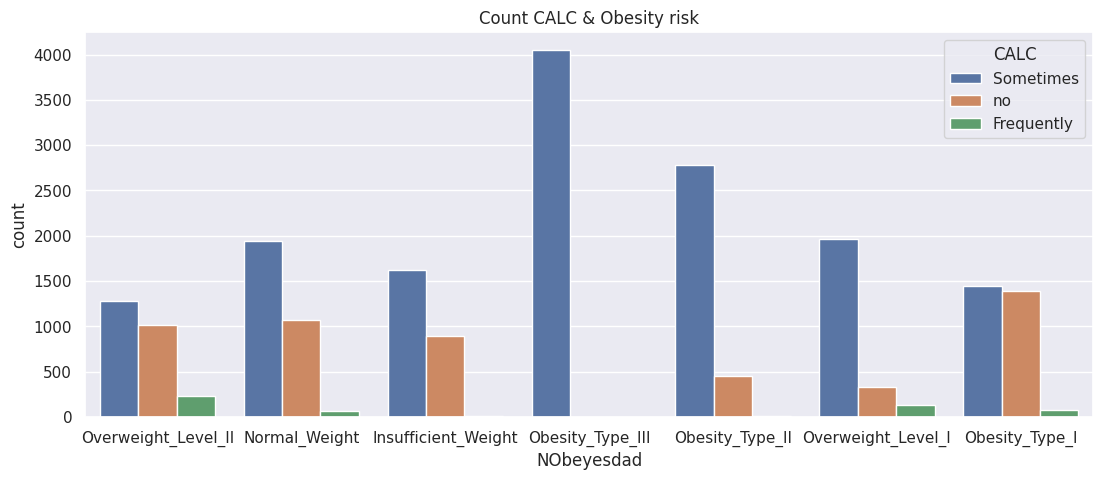

In [12]:
plt.figure(figsize=(13,5))
plt.title("Count CALC & Obesity risk")
sns.countplot(data=train_data, x='NObeyesdad', hue="CALC");

<Axes: title={'center': 'Count SCC & Obesity risk'}, xlabel='NObeyesdad', ylabel='count'>

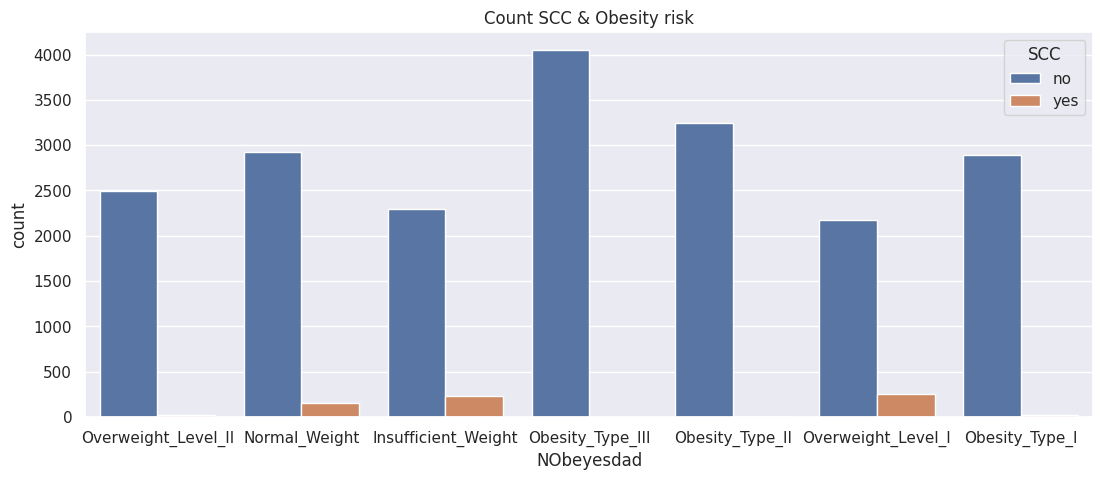

In [13]:
plt.figure(figsize=(13,5))
plt.title("Count SCC & Obesity risk")
sns.countplot(data=train_data, x='NObeyesdad', hue="SCC")

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


**Change categorical variables to encoded version**

In [16]:
X = train_data[["Weight", "Height", "Age", "CH2O", "FCVC", "FAVC", "CALC", "family_history_with_overweight"]]
y = train_data["NObeyesdad"]

X_test = test_data[["Weight", "Height", "Age", "CH2O", "FCVC", "FAVC", "CALC", "family_history_with_overweight"]]

X = pd.get_dummies(X, columns=["FAVC", "CALC", "family_history_with_overweight"])
X_test = pd.get_dummies(X_test, columns=["FAVC", "CALC", "family_history_with_overweight"])
X_test = X_test.drop(["CALC_Always"], axis=1)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape, y_train.shape)
print("Valid data:", X_valid.shape, y_valid.shape)
print("Test data:", X_test.shape)

Training data: (16606, 12) (16606,)
Valid data: (4152, 12) (4152,)
Test data: (13840, 12)


**MODELLING**

Simple Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [19]:
tree_model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01).fit(X_train, y_train)

In [20]:
tree_model.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [21]:
feature_names = X_train.columns
feature_names

Index(['Weight', 'Height', 'Age', 'CH2O', 'FCVC', 'FAVC_no', 'FAVC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes'],
      dtype='object')

**Gain some model interpretability**

In [22]:
feature_importance = pd.DataFrame(tree_model.feature_importances_, index=feature_names)
feature_importance

,0
Weight,0.574836
Height,0.126397
Age,0.045713
CH2O,0.000000
FCVC,0.253055
FAVC_no,0.000000
FAVC_yes,0.000000
CALC_Frequently,0.000000
CALC_Sometimes,0.000000
CALC_no,0.000000


<Axes: >

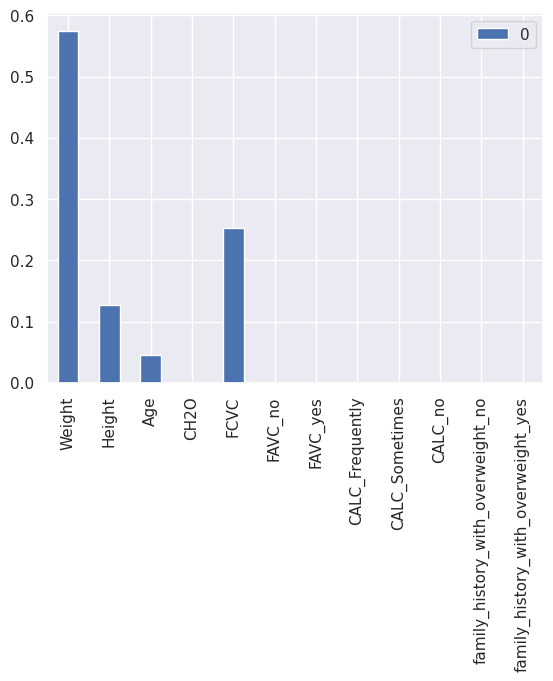

In [23]:
feature_importance.plot(kind="bar")

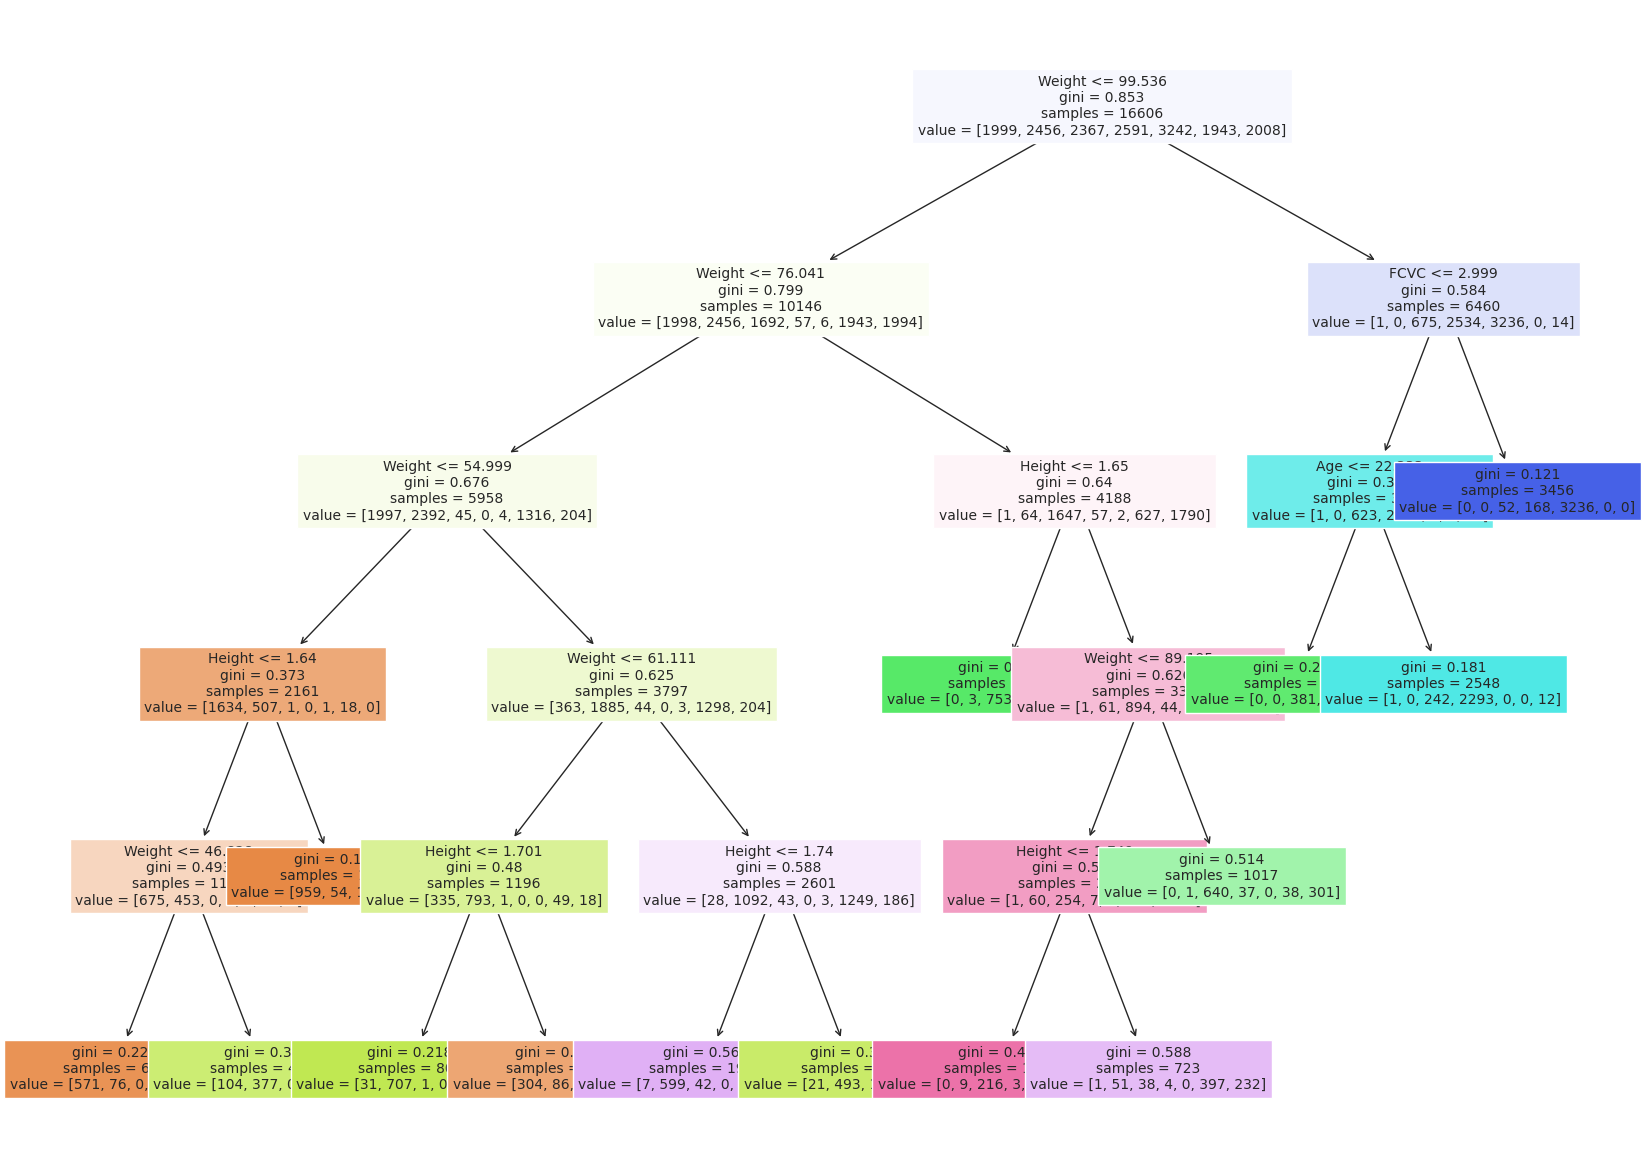

In [24]:
from sklearn import tree

fig = plt.figure(figsize=(20, 15))
_ = tree.plot_tree(tree_model,
                   feature_names=feature_names,
                   filled=True,
                   fontsize=10,
                   label="all")

In [25]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
random_forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [27]:
feature_importance_random_forest = pd.DataFrame(random_forest_model.feature_importances_, index=feature_names)
feature_importance_random_forest

,0
Weight,0.428174
Height,0.157818
Age,0.134801
CH2O,0.066421
FCVC,0.130106
FAVC_no,0.007347
FAVC_yes,0.007059
CALC_Frequently,0.003215
CALC_Sometimes,0.017007
CALC_no,0.013296


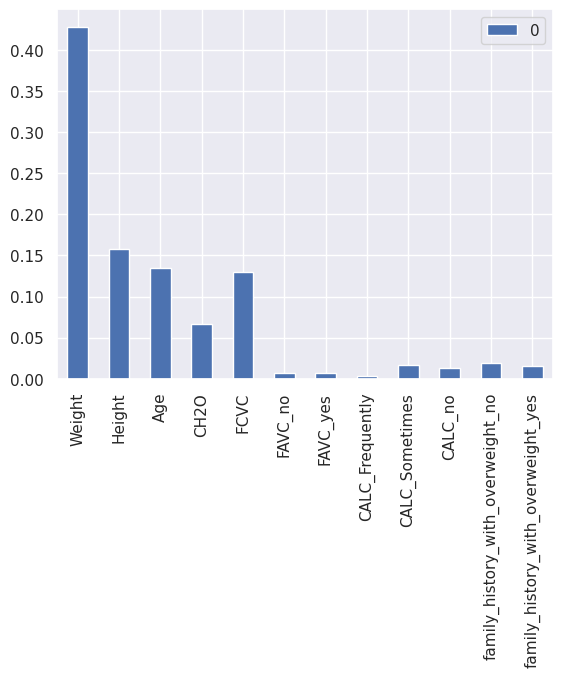

In [28]:
feature_importance_random_forest.plot(kind="bar");

**Random Forest Evaluation**

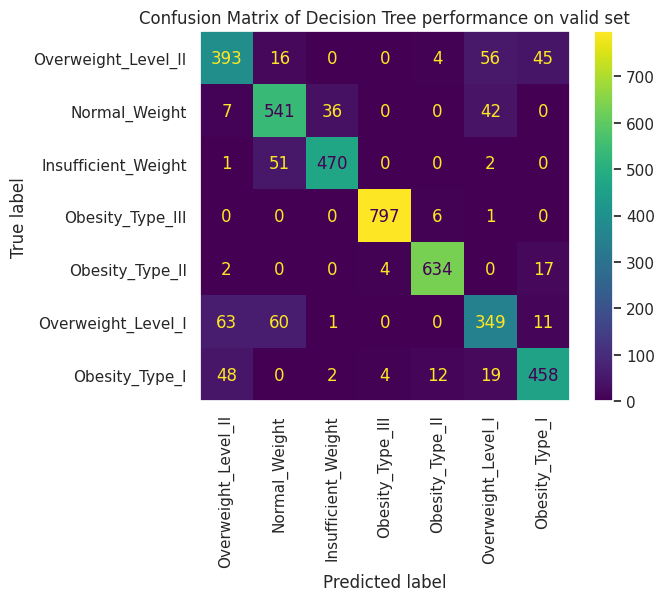

In [29]:
sns.set(style="dark") #drop the grid
predictions = random_forest_model.predict(X_valid)
cm = confusion_matrix(y_valid, predictions, labels=train_data["NObeyesdad"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data["NObeyesdad"].unique())
disp.plot()
plt.title("Confusion Matrix of Decision Tree performance on valid set")
plt.xticks(rotation=90)
plt.show();

In [30]:
print(classification_report(y_valid, predictions, target_names=train_data["NObeyesdad"].unique()))

                     precision    recall  f1-score   support

Overweight_Level_II       0.92      0.90      0.91       524
      Normal_Weight       0.81      0.86      0.84       626
Insufficient_Weight       0.86      0.84      0.85       543
   Obesity_Type_III       0.97      0.96      0.97       657
    Obesity_Type_II       0.99      0.99      0.99       804
 Overweight_Level_I       0.74      0.72      0.73       484
     Obesity_Type_I       0.76      0.76      0.76       514

           accuracy                           0.88      4152
          macro avg       0.87      0.86      0.86      4152
       weighted avg       0.88      0.88      0.88      4152



In [31]:
from joblib import dump

try:
  dump(tree_model, "/content/tree_classifier_obesity_risk.pkl")
  dump(random_forest_model, "/content/random_forest_classifier_obesity_risk.pkl")
except:
  print("An error occured during saving the model")